In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
merged = pd.read_pickle("/Users/taekunkim/Documents/github/flock-freight/data/pickles/merged_clean.pkl")
subset = merged[["APPROXIMATE_DRIVING_ROUTE_MILEAGE", "REFERENCE_NUMBER", "OFFER_TYPE", "RATE_USD", "PALLETIZED_LINEAR_FEET", "LOAD_DELIVERED_FROM_OFFER", "CREATED_ON_HQ", "ORDER_DATETIME_PST"]]
subset["MILES_BIN"] = subset["APPROXIMATE_DRIVING_ROUTE_MILEAGE"]//100*100

Text(0.5, 1.0, 'Number of Offers VS Miles')

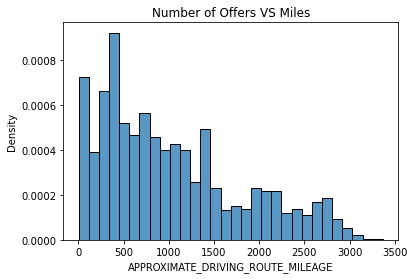

In [3]:
sns.histplot(subset["APPROXIMATE_DRIVING_ROUTE_MILEAGE"], bins=30, stat="density")
plt.title("Number of Offers VS Miles")

Text(0.5, 1.0, 'Number of Orders VS Miles')

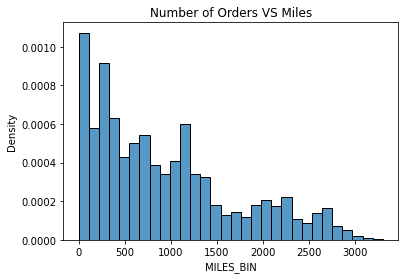

In [4]:
sns.histplot(data=subset.groupby("REFERENCE_NUMBER").first()["MILES_BIN"], bins=30, stat="density")
plt.title("Number of Orders VS Miles")

(0.0, 1.0)

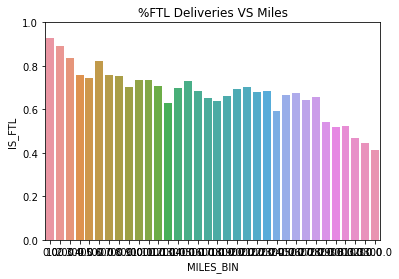

In [5]:
subset["IS_FTL"] = subset["OFFER_TYPE"] != "pool"
sns.barplot(data=subset[subset["LOAD_DELIVERED_FROM_OFFER"]].groupby("MILES_BIN").agg({"IS_FTL": "mean"}).reset_index(), x="MILES_BIN", y="IS_FTL")
plt.title("%FTL Deliveries VS Miles")
plt.ylim(0, 1)

(0.0, 1.0)

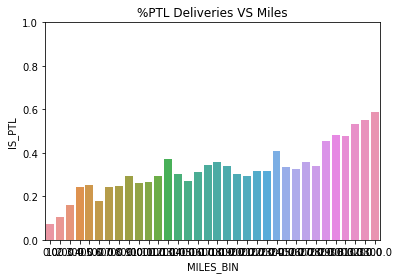

In [14]:
subset["IS_PTL"] = subset["OFFER_TYPE"] == "pool"
sns.barplot(data=subset[subset["LOAD_DELIVERED_FROM_OFFER"]].groupby("MILES_BIN").agg({"IS_PTL": "mean"}).reset_index(), x="MILES_BIN", y="IS_PTL")
plt.title("%PTL Deliveries VS Miles")
plt.ylim(0, 1)

Text(0.5, 1.0, 'MEDIAN RATE_USD VS Miles')

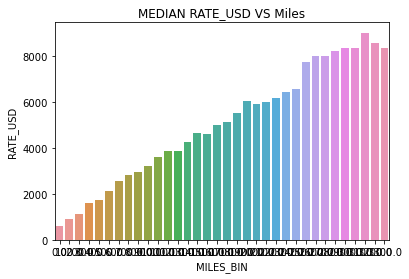

In [7]:
sns.barplot(data=subset[subset["LOAD_DELIVERED_FROM_OFFER"]].groupby("MILES_BIN")["RATE_USD"].median().to_frame().reset_index(), x="MILES_BIN", y="RATE_USD")
plt.title("MEDIAN RATE_USD VS Miles")

Text(0.5, 1.0, 'MEAN RATE_USD VS Miles')

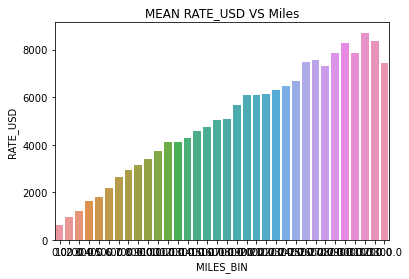

In [8]:
sns.barplot(data=subset[subset["LOAD_DELIVERED_FROM_OFFER"]].groupby("MILES_BIN")["RATE_USD"].mean().to_frame().reset_index(), x="MILES_BIN", y="RATE_USD")
plt.title("MEAN RATE_USD VS Miles")

In [9]:
subset[subset["LOAD_DELIVERED_FROM_OFFER"]].groupby("MILES_BIN")["RATE_USD"].describe()

,count,mean,std,min,25%,50%,75%,max
MILES_BIN,,,,,,,,
0.0,11968.0,646.330775,295.444318,38.70,457.95000,612.75000,774.0000,7095.0
100.0,7214.0,964.458366,445.535073,87.72,701.71485,903.00000,1161.0000,7740.0
200.0,10402.0,1207.914110,571.474845,161.25,838.50000,1116.34665,1457.7000,9030.0
300.0,16554.0,1617.130484,692.613855,161.25,1096.50000,1612.50000,1999.5000,10320.0
400.0,11294.0,1819.963731,800.545031,161.25,1290.00000,1741.50000,2193.0000,8707.5
500.0,7756.0,2188.016327,921.629293,161.25,1548.00000,2141.82570,2580.0000,9288.0
600.0,9009.0,2648.963745,1101.524464,174.15,1870.50000,2580.00000,3354.0000,11610.0
700.0,9812.0,2919.865989,1204.115053,322.50,2064.00000,2838.00000,3612.0000,13545.0
800.0,6890.0,3157.080025,1368.810226,167.70,2193.00000,2967.00000,3870.0000,11610.0


In [10]:
subset["ELAPSED TIME"] = subset["CREATED_ON_HQ"] - subset["ORDER_DATETIME_PST"]

Text(0.5, 1.0, 'MEAN ELAPSED HOURS VS MILES')

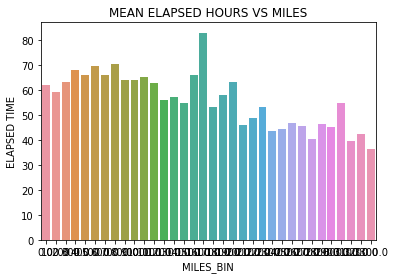

In [11]:
time_vs_miles = subset[subset["LOAD_DELIVERED_FROM_OFFER"]][["MILES_BIN", "ELAPSED TIME"]]
time_vs_miles["ELAPSED TIME"] = time_vs_miles["ELAPSED TIME"] // np.timedelta64(1, 'h')
sns.barplot(data=time_vs_miles.groupby("MILES_BIN").mean().reset_index(), x="MILES_BIN", y="ELAPSED TIME")
plt.title("MEAN Hours it took to accept offer VS Miles")

Text(0.5, 1.0, 'MEDIAN ELAPSED HOURS VS MILES')

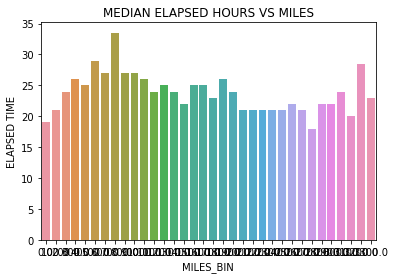

In [12]:
sns.barplot(data=time_vs_miles.groupby("MILES_BIN").median().reset_index(), x="MILES_BIN", y="ELAPSED TIME")
plt.title("MEAN Hours it took to accept offer VS Miles")

In [13]:
time_vs_miles.groupby("MILES_BIN").describe()

ELAPSED TIME                                                   \
                 count       mean         std   min    25%   50%    75%   
MILES_BIN                                                                 
0.0            11968.0  62.056317  108.237994  -1.0   1.00  19.0  81.25   
100.0           7214.0  59.116440   95.802595  -1.0   2.00  21.0  88.00   
200.0          10402.0  63.239281  101.640978  -2.0   4.00  24.0  91.00   
300.0          16554.0  68.052797   94.027137  -2.0   4.00  26.0  98.00   
400.0          11294.0  66.249336   92.911077  -1.0   5.00  25.0  95.00   
500.0           7756.0  69.576844   93.095603  -1.0   7.00  29.0  99.00   
600.0           9009.0  66.238206   85.692430  -1.0   9.00  27.0  95.00   
700.0           9812.0  70.666633   96.255773  -1.0   7.00  33.5  99.00   
800.0           6890.0  64.136284   85.883461   0.0  10.00  27.0  94.00   
900.0           6038.0  64.103180   81.635413  -3.0   7.00  27.0  95.00   
1000.0          7332.0  65.383933   93.538266  -1.0   5.00  26.0  94.00   
1100.0          6539.0  63.021410   87.787368  -1.0   4.00  24.0  92.00   
1200.0          4110.0  55.980535   73.453552  -1.0   6.00  25.0  88.00   
1300.0          5991.0  57.489401   84.074205  -1.0   5.00  24.0  78.00   
1400.0          5672.0  54.860719   94.105577  -1.0   3.00  22.0  70.00   
1500.0          3078.0  66.057830  131.666170  -1.0   5.00  25.0  89.00   
1600.0          2253.0  83.043941  181.418553  -1.0   3.00  25.0  95.00   
1700.0          2539.0  53.272942   69.945464  -2.0   3.00  23.0  87.00   
1800.0          2023.0  58.062778   73.755984   0.0   5.00  26.0  89.00   
1900.0          3118.0  63.304362  105.094073  -1.0   4.00  24.0  90.00   
2000.0          3487.0  45.960998   62.334464  -1.0   2.00  21.0  69.00   
2100.0          3025.0  48.738843   73.123852  -1.0   3.00  21.0  68.00   
2200.0          2083.0  53.148344   93.256984 -16.0   2.00  21.0  69.00   
2300.0          1690.0  43.863905   59.032012  -1.0   3.00  21.0  67.00   
2400.0          1902.0  44.344374   58.769280  -1.0   3.00  21.0  68.00   
2500.0          1544.0  46.772668   69.257703   0.0   3.00  22.0  67.00   
2600.0          2405.0  45.571310   66.769119  -2.0   3.00  21.0  67.00   
2700.0          2831.0  40.498057   64.366381  -1.0   1.00  18.0  57.50   
2800.0          1204.0  46.290698   69.375197  -1.0   3.00  22.0  68.00   
2900.0           876.0  45.396119   57.010250  -1.0   4.00  22.0  69.00   
3000.0           319.0  54.909091   64.489245   0.0   5.00  24.0  94.00   
3100.0           143.0  39.510490   56.708281   0.0   3.00  20.0  49.50   
3200.0            56.0  42.553571   39.991326   0.0   2.75  28.5  71.00   
3300.0            29.0  36.379310   40.351504   0.0   4.00  23.0  67.00   

                   
              max  
MILES_BIN          
0.0        1534.0  
100.0      2228.0  
200.0      2384.0  
300.0      1665.0  
400.0      1337.0  
500.0      1104.0  
600.0      1001.0  
700.0      1848.0  
800.0      1104.0  
900.0      1542.0  
1000.0     1706.0  
1100.0     1368.0  
1200.0      962.0  
1300.0     1644.0  
1400.0     1246.0  
1500.0     2631.0  
1600.0     2042.0  
1700.0      690.0  
1800.0      587.0  
1900.0     1673.0  
2000.0      573.0  
2100.0      770.0  
2200.0     1074.0  
2300.0      529.0  
2400.0      407.0  
2500.0      798.0  
2600.0      788.0  
2700.0      888.0  
2800.0      601.0  
2900.0      428.0  
3000.0      312.0  
3100.0      336.0  
3200.0      136.0  
3300.0      145.0